# CSC 466 Project Codebook: Question 1 Association Rules Mining

Brendan Callender, Andrew Kerr, Martin Hsu, Sophia Chung

In [8]:
import pandas as pd
import numpy as np
import os
import wget
import zipfile

from apriori import *

## Data Load

In [14]:
if not os.path.exists("data/beneficiary/DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv"):
    wget.download("https://www.cms.gov/research-statistics-data-and-systems/downloadable-public-use-files/synpufs/downloads/de1_0_2008_beneficiary_summary_file_sample_1.zip", "de1_0_2008_beneficiary_summary_file_sample_1.zip")
    with zipfile.ZipFile("de1_0_2008_beneficiary_summary_file_sample_1.zip", 'r') as zip_ref:
        zip_ref.extractall("data/beneficiary")
    os.remove("de1_0_2008_beneficiary_summary_file_sample_1.zip")
if not os.path.exists("data/beneficiary/DE1_0_2009_Beneficiary_Summary_File_Sample_1.csv"):
    wget.download("https://www.cms.gov/research-statistics-data-and-systems/downloadable-public-use-files/synpufs/downloads/de1_0_2009_beneficiary_summary_file_sample_1.zip", "de1_0_2009_beneficiary_summary_file_sample_1.zip")
    with zipfile.ZipFile("de1_0_2009_beneficiary_summary_file_sample_1.zip", 'r') as zip_ref:
        zip_ref.extractall("data/beneficiary")
    os.remove("de1_0_2009_beneficiary_summary_file_sample_1.zip")
if not os.path.exists("data/beneficiary/DE1_0_2010_Beneficiary_Summary_File_Sample_1.csv"):
    wget.download("https://www.cms.gov/research-statistics-data-and-systems/statistics-trends-and-reports/synpufs/downloads/de1_0_2010_beneficiary_summary_file_sample_20.zip", "de1_0_2010_beneficiary_summary_file_sample_1.zip")
    with zipfile.ZipFile("de1_0_2010_beneficiary_summary_file_sample_1.zip", 'r') as zip_ref:
        zip_ref.extractall("data/beneficiary")
    os.remove("de1_0_2010_beneficiary_summary_file_sample_1.zip")

## Data Wrangling

In [27]:
bene_2008 = pd.read_csv("data/beneficiary/DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv")
bene_2008 = bene_2008.set_index("DESYNPUF_ID")[["SP_ALZHDMTA", "SP_CHF", "SP_CHRNKIDN",
                                                "SP_CNCR", "SP_COPD", "SP_DEPRESSN",
                                                "SP_DIABETES", "SP_ISCHMCHT", "SP_OSTEOPRS",
                                                "SP_RA_OA", "SP_STRKETIA"]].mod(2)
bene_2008

,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA
DESYNPUF_ID,,,,,,,,,,,
00013D2EFD8E45D1,0,0,0,0,0,0,0,0,0,0,0
00016F745862898F,0,0,0,0,0,0,0,0,0,0,0
0001FDD721E223DC,0,0,0,0,0,0,0,0,0,0,0
00021CA6FF03E670,0,0,0,0,0,0,0,0,0,0,0
00024B3D2352D2D0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
FFFD7C464C94D136,0,0,0,0,0,0,0,0,0,0,0
FFFE3ED9582AD46E,0,0,0,0,0,1,1,1,1,1,0
FFFE7AB5D7F1725D,0,0,0,0,0,0,0,0,0,0,0


In [28]:
bene_2009 = pd.read_csv("data/beneficiary/DE1_0_2009_Beneficiary_Summary_File_Sample_1.csv")
bene_2009 = bene_2009.set_index("DESYNPUF_ID")[["SP_ALZHDMTA", "SP_CHF", "SP_CHRNKIDN",
                                                "SP_CNCR", "SP_COPD", "SP_DEPRESSN",
                                                "SP_DIABETES", "SP_ISCHMCHT", "SP_OSTEOPRS",
                                                "SP_RA_OA", "SP_STRKETIA"]].mod(2)
bene_2009

,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA
DESYNPUF_ID,,,,,,,,,,,
00013D2EFD8E45D1,0,0,0,0,0,0,0,0,0,0,0
00016F745862898F,1,0,1,0,0,1,1,1,0,1,1
0001FDD721E223DC,0,0,0,0,0,0,0,0,0,0,0
00021CA6FF03E670,0,0,0,0,0,0,0,1,0,0,0
00024B3D2352D2D0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
FFFD7C464C94D136,0,0,0,0,0,0,0,0,0,0,0
FFFE3ED9582AD46E,0,1,1,1,0,1,1,1,0,0,0
FFFE7AB5D7F1725D,0,0,0,0,0,0,0,0,0,0,0


In [29]:
bene_2010 = pd.read_csv("data/beneficiary/DE1_0_2010_Beneficiary_Summary_File_Sample_1.csv")
bene_2010 = bene_2010.set_index("DESYNPUF_ID")[["SP_ALZHDMTA", "SP_CHF", "SP_CHRNKIDN",
                                                "SP_CNCR", "SP_COPD", "SP_DEPRESSN",
                                                "SP_DIABETES", "SP_ISCHMCHT", "SP_OSTEOPRS",
                                                "SP_RA_OA", "SP_STRKETIA"]].mod(2)
bene_2010

,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA
DESYNPUF_ID,,,,,,,,,,,
00013D2EFD8E45D1,0,1,0,0,0,0,0,0,1,0,0
00016F745862898F,1,1,1,0,0,0,1,0,0,0,0
0001FDD721E223DC,0,0,0,0,0,0,0,0,0,0,0
00021CA6FF03E670,0,0,0,0,0,0,0,0,0,0,0
00024B3D2352D2D0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
FFFD7C464C94D136,0,0,0,0,0,0,0,0,0,0,0
FFFE3ED9582AD46E,0,0,0,0,0,0,1,0,1,0,0
FFFE7AB5D7F1725D,0,0,0,0,0,0,0,0,0,0,0


In [34]:
benes_ip = pd.DataFrame({"DESYNPUF_ID": pd.read_csv("data/inpatient/DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv")["DESYNPUF_ID"].unique()})
benes_ip

,DESYNPUF_ID
0,00013D2EFD8E45D1
1,00016F745862898F
2,00052705243EA128
3,0007F12A492FD25D
4,000B97BA2314E971
...,...
37775,FFF5F9218AB04A41
37776,FFF8B49458F9FFA7
37777,FFFA950301FCA748
37778,FFFC880E13CA6278


In [36]:
benes = pd.concat([bene_2010, bene_2009, bene_2008])
benes = benes[~benes.index.duplicated(keep='first')]
benes = benes.merge(right=benes_ip, left_index=True, right_on="DESYNPUF_ID").set_index("DESYNPUF_ID")
benes

,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA
DESYNPUF_ID,,,,,,,,,,,
00013D2EFD8E45D1,0,1,0,0,0,0,0,0,1,0,0
00016F745862898F,1,1,1,0,0,0,1,0,0,0,0
00052705243EA128,0,0,1,1,0,0,1,1,0,0,0
0007F12A492FD25D,0,1,1,0,1,1,1,1,0,0,0
000B97BA2314E971,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
FABB31F818D27D31,0,1,1,0,1,1,1,1,1,1,0
FAE53771C454A604,1,1,0,0,1,1,1,1,1,0,0
FC52CEBDED1077B1,1,1,1,1,0,1,1,1,1,0,1


## Frequent Itemsets Exploration

<Axes: >

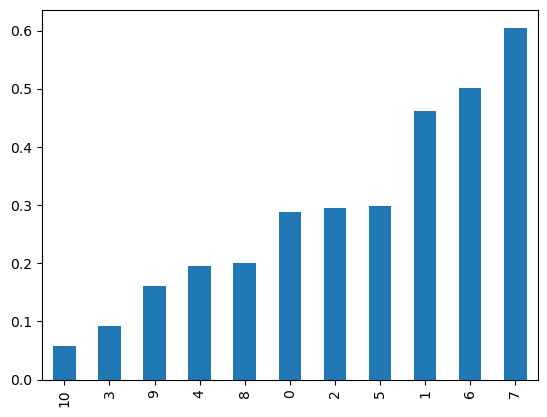

In [37]:
benes.sum(axis=0).reset_index(drop=True).sort_values().divide(len(benes.index)).plot.bar()
plt.show()

In [38]:
benes.to_csv("data/Q1.csv", header = False)

ccs = pd.Series(benes.columns).to_frame().reset_index()
ccs.columns = ["Id", "CC"]
ccs.to_csv("data/Q1_header.csv", index=False)

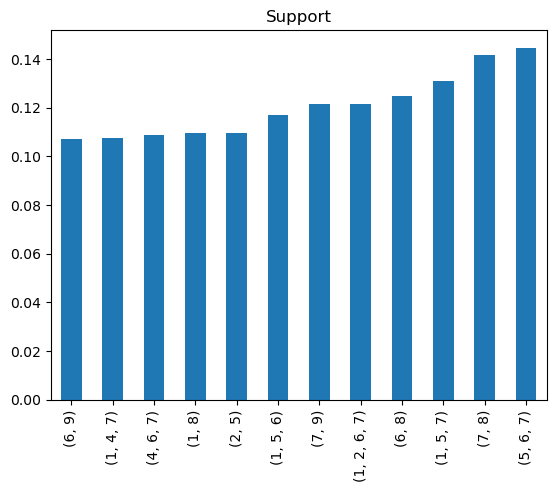

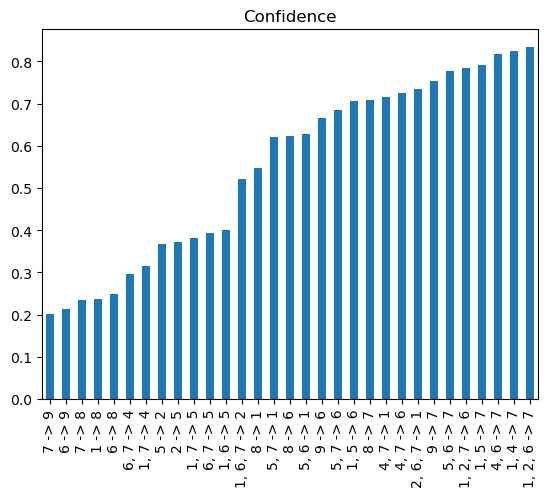

In [39]:
apriori_explore("data/Q1.csv", 0.1, sparse=False)

## Final Results: Skyline Frequent Itemsets and Singleton Association Rules

In [42]:
results = apriori_full("data/Q1.csv", minSup=0.1, minConf=0.75, Ipath = "data/Q1_header.csv", Icol="Id", Inames="CC", sparse=False)

minSup: 0.100000, minConf: 0.750000

Skyline Frequent Itemsets:
[('SP_CHF', 'SP_OSTEOPRS'), ('SP_CHRNKIDN', 'SP_DEPRESSN'), ('SP_DIABETES', 'SP_OSTEOPRS'), ('SP_DIABETES', 'SP_RA_OA'), ('SP_ISCHMCHT', 'SP_OSTEOPRS'), ('SP_ISCHMCHT', 'SP_RA_OA'), ('SP_CHF', 'SP_COPD', 'SP_ISCHMCHT'), ('SP_CHF', 'SP_DEPRESSN', 'SP_DIABETES'), ('SP_CHF', 'SP_DEPRESSN', 'SP_ISCHMCHT'), ('SP_COPD', 'SP_DIABETES', 'SP_ISCHMCHT'), ('SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT'), ('SP_CHF', 'SP_CHRNKIDN', 'SP_DIABETES', 'SP_ISCHMCHT')]

Singleton Association Rules:
Rule 1: SP_RA_OA ---> SP_ISCHMCHT [sup = 0.12139, conf = 0.75415]
Rule 2: SP_CHF | SP_COPD ---> SP_ISCHMCHT [sup = 0.10752, conf = 0.82460]
Rule 3: SP_CHF | SP_DEPRESSN ---> SP_ISCHMCHT [sup = 0.13086, conf = 0.79155]
Rule 4: SP_COPD | SP_DIABETES ---> SP_ISCHMCHT [sup = 0.10873, conf = 0.81800]
Rule 5: SP_DEPRESSN | SP_DIABETES ---> SP_ISCHMCHT [sup = 0.14463, conf = 0.77824]
Rule 6: SP_CHF | SP_CHRNKIDN | SP_ISCHMCHT ---> SP_DIABETES [sup = 0.12139,